# __Webscraping IMDB Top 250 Movies Data__ #
#

In [6]:
from bs4 import BeautifulSoup as bs
from lxml import html
import json
import requests
import pandas as pd

url = 'https://m.imdb.com/chart/top/?ref_=nv_mv_250'

requests.get(url)

<Response [403]>

__*Got 403 ERROR__ \
\
__- Try to modify the headers__

In [7]:
# Modify headers
headers = {
    "User-Agent":"Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.182 Safari/537.36",
    "Accept-Encoding":"gzip, deflate",
    "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
    "DNT":"1","Connection":"close",
    "Upgrade-Insecure-Requests":"1"
}

__- Retry requests__

In [8]:
requests.get(url,headers=headers)

<Response [200]>

__*Response 200; request has now succeeded__ \
\
__- Continue parsing the HTML__

In [9]:
source = requests.get(url,headers=headers)

soup = bs(source.text,'lxml')

In [5]:
movies = soup.find('ul',class_="ipc-metadata-list ipc-metadata-list--dividers-between sc-9d2f6de0-0 iMNUXk compact-list-view ipc-metadata-list--base")

movielist = []

for x in movies:
    
    # Movie Rank
    rank = x.find('h3',class_="ipc-title__text").text.split('.')[0]
    
    
    # Movie Title
    title = x.find('h3',class_="ipc-title__text").text.split('.')[1]
    
    
    # Release Year
    year = x.find('div',class_="sc-c7e5f54-7 bVlcQU cli-title-metadata").\
           find_all('span',class_="sc-c7e5f54-8 fiTXuB cli-title-metadata-item")\
           [0].text
    
    
    # Movie Length
    length = x.find('div',class_="sc-c7e5f54-7 bVlcQU cli-title-metadata").\
               find_all('span',class_="sc-c7e5f54-8 fiTXuB cli-title-metadata-item")\
               [1].text
    
    
    # Film Rating
    film_rating = x.find('div',class_="sc-c7e5f54-7 bVlcQU cli-title-metadata").\
                  find_all('span',class_="sc-c7e5f54-8 fiTXuB cli-title-metadata-item")\
                  [2].text
    
    
    # IMDB Rating
    IMDB_rating = x.find('span',class_="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating")["aria-label"].split(': ')[1]   
    
    
    # Number of Votes
    # Exact number of votes need to be parsed from another page
    votes_link = 'https://m.imdb.com' + x.find('a',class_="ipc-title-link-wrapper")['href']
    votes_source = requests.get(votes_link,headers=headers)
    votes_soup = bs(votes_source.text,'lxml')
    
    votes_link2 = 'https://m.imdb.com' + votes_soup.find('a',class_="ipc-btn ipc-btn--single-padding ipc-btn--center-align-content ipc-btn--default-height ipc-btn--core-baseAlt ipc-btn--theme-baseAlt ipc-btn--on-textPrimary ipc-text-button sc-acdbf0f3-2 caaLCv")["href"]
    votes_source2 = requests.get(votes_link2,headers=headers)
    votes_soup2 = bs(votes_source2.text,'lxml')
    
    findVoteCount = votes_soup2.find('script',id="__NEXT_DATA__").text
    data = json.loads(findVoteCount)
    
    number_of_votes = data["props"]["pageProps"]["contentData"]["histogramData"]['totalVoteCount']
    
    
    # Populate movielist
    movie = {'Rank': rank, 
             'Title': title, 
             'Release Year': year, 
             'Length': length,
             'Film Rating': film_rating,
             'IMDB Rating': IMDB_rating, 
             'number_of_votes': number_of_votes}
    
    movielist.append(movie)
    print('Saving: ', movie['Rank']) # progress indicator

Saving:  1
Saving:  2


KeyboardInterrupt: 

__*Error happened at movie rank 77__

__- Check the source:__ \
__*Missing Movie Rating__ \
\
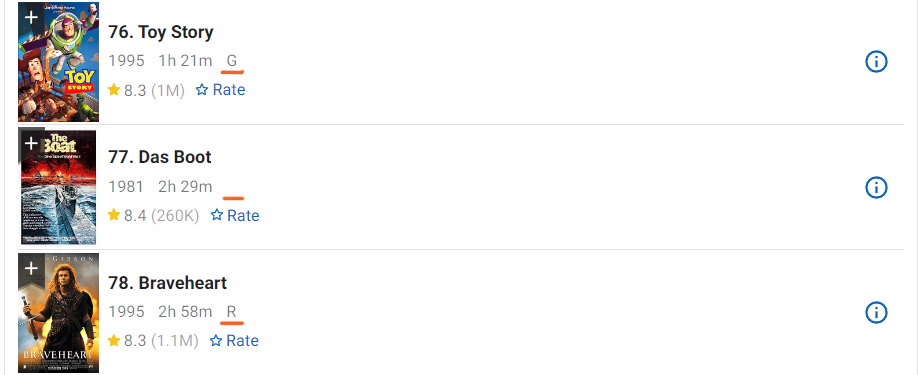\
\
\
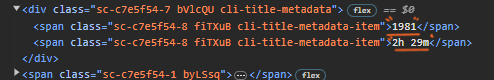


\
\
\
__*Revise the code to parse Movie Rating__ \
__*Set movie rating to null for movie with no movie rating__

In [10]:
movies = soup.find('ul',class_="ipc-metadata-list ipc-metadata-list--dividers-between sc-9d2f6de0-0 iMNUXk compact-list-view ipc-metadata-list--base")

movielist = []

for x in movies:
    
    # Movie Rank
    rank = x.find('h3',class_="ipc-title__text").text.split('.')[0]
    
    
    # Movie Title
    title = x.find('h3',class_="ipc-title__text").text.split('.')[1]
    
    
    # Release Year
    year = x.find('div',class_="sc-c7e5f54-7 bVlcQU cli-title-metadata").\
           find_all('span',class_="sc-c7e5f54-8 fiTXuB cli-title-metadata-item")\
           [0].text
    
    
    # Movie Length
    length = x.find('div',class_="sc-c7e5f54-7 bVlcQU cli-title-metadata").\
               find_all('span',class_="sc-c7e5f54-8 fiTXuB cli-title-metadata-item")\
               [1].text
    
    
    # Film Rating
    try:
        film_rating = x.find('div',class_="sc-c7e5f54-7 bVlcQU cli-title-metadata").\
                      find_all('span',class_="sc-c7e5f54-8 fiTXuB cli-title-metadata-item")\
                      [2].text
    except:
        film_rating = ""
    
    
    # IMDB Rating
    IMDB_rating = x.find('span',class_="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating")["aria-label"].split(': ')[1]   
    
    
    # Number of Votes
    # Exact number of votes need to be parsed from another page
    # Revised Code
    votes_link = 'https://m.imdb.com' + x.find('a',class_="ipc-title-link-wrapper")['href']
    votes_source = requests.get(votes_link,headers=headers)
    votes_soup = bs(votes_source.text,'lxml')
    
    votes_link2 = 'https://m.imdb.com' + votes_soup.find('a',class_="ipc-btn ipc-btn--single-padding ipc-btn--center-align-content ipc-btn--default-height ipc-btn--core-baseAlt ipc-btn--theme-baseAlt ipc-btn--on-textPrimary ipc-text-button sc-acdbf0f3-2 caaLCv")["href"]
    votes_source2 = requests.get(votes_link2,headers=headers)
    votes_soup2 = bs(votes_source2.text,'lxml')
    
    findVoteCount = votes_soup2.find('script',id="__NEXT_DATA__").text
    data = json.loads(findVoteCount)
    
    number_of_votes = data["props"]["pageProps"]["contentData"]["histogramData"]['totalVoteCount']
    
    
    # Populate movielist
    movie = {'Rank': rank, 
             'Title': title, 
             'Release Year': year, 
             'Length': length,
             'Film Rating': film_rating,
             'IMDB Rating': IMDB_rating, 
             'Number of Votes': number_of_votes}
    
    
    movielist.append(movie)
    print('Saving: ', movie['Rank']) # progress indicator

Saving:  1
Saving:  2
Saving:  3
Saving:  4
Saving:  5
Saving:  6
Saving:  7
Saving:  8
Saving:  9
Saving:  10
Saving:  11
Saving:  12
Saving:  13
Saving:  14
Saving:  15
Saving:  16
Saving:  17
Saving:  18
Saving:  19
Saving:  20
Saving:  21
Saving:  22
Saving:  23
Saving:  24
Saving:  25
Saving:  26
Saving:  27
Saving:  28
Saving:  29
Saving:  30
Saving:  31
Saving:  32
Saving:  33
Saving:  34
Saving:  35
Saving:  36
Saving:  37
Saving:  38
Saving:  39
Saving:  40
Saving:  41
Saving:  42
Saving:  43
Saving:  44
Saving:  45
Saving:  46
Saving:  47
Saving:  48
Saving:  49
Saving:  50
Saving:  51
Saving:  52
Saving:  53
Saving:  54
Saving:  55
Saving:  56
Saving:  57
Saving:  58
Saving:  59
Saving:  60
Saving:  61
Saving:  62
Saving:  63
Saving:  64
Saving:  65
Saving:  66
Saving:  67
Saving:  68
Saving:  69
Saving:  70
Saving:  71
Saving:  72
Saving:  73
Saving:  74
Saving:  75
Saving:  76
Saving:  77
Saving:  78
Saving:  79
Saving:  80
Saving:  81
Saving:  82
Saving:  83
Saving:  84
S

__*Sucessfully parsed__
\
\
\
__Check Movie Rank 77 and check the first five rows__

In [15]:
df = pd.DataFrame(movielist)
print(df.loc[[76]]) #Check Movie Rank 77

   Rank      Title Release Year  Length Film Rating IMDB Rating  \
76   77   Das Boot         1981  2h 29m                     8.4   

    Number of Votes  
76           260184  


In [16]:
print(df.head()) # Check the first five rows

  Rank                      Title Release Year  Length Film Rating  \
0    1   The Shawshank Redemption         1994  2h 22m         18+   
1    2              The Godfather         1972  2h 55m         18+   
2    3            The Dark Knight         2008  2h 32m           R   
3    4     The Godfather: Part II         1974  3h 22m         18+   
4    5               12 Angry Men         1957  1h 36m          SU   

  IMDB Rating  Number of Votes  
0         9.3          2819453  
1         9.2          1965046  
2         9.0          2800973  
3         9.0          1334018  
4         9.0           840314  


\
__Export Data to Excel & SQL__

In [99]:
df.to_excel(r'C:\Users\user\DATA ANALYST PROJECTS\Web Scraping\IMDB_Data\MovieList_dataframe.xlsx', index=False) # Dataframe to Excel
df.to_sql(r'C:\Users\user\DATA ANALYST PROJECTS\Web Scraping\IMDB_Data\MovieList_dataframe.xlsx', index=False) # Dataframe to SQL